In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from util import read_experiment_df

In [5]:
sns.set()

df = read_experiment_df("data/experiment.log")
df.head()

,experiment_id,hyperparameters.data.num_epochs,hyperparameters.data.shuffle,hyperparameters.model.l1_regularization_strength,hyperparameters.model.l2_regularization_strength,hyperparameters.model.learning_rate,interval_seconds,metrics.average_loss,metrics.global_step,metrics.label/mean,metrics.loss,metrics.prediction/mean,partition,time
0,60_mins,1,False,0.5,0.5,0.1,3600,0.197011,0.0,0.197011,24.166666,0.000000,0,0
1,60_mins,1,False,0.5,0.5,0.1,3600,0.158927,18.0,0.252720,18.991819,0.176168,1,3600
2,60_mins,1,False,0.5,0.5,0.1,3600,0.168830,28.0,0.311161,21.393127,0.313061,2,7200
3,60_mins,1,False,0.5,0.5,0.1,3600,0.141725,35.0,0.235593,16.723545,0.272759,3,10800
4,60_mins,1,False,0.5,0.5,0.1,3600,0.133781,45.0,0.178326,16.961090,0.200528,4,14400


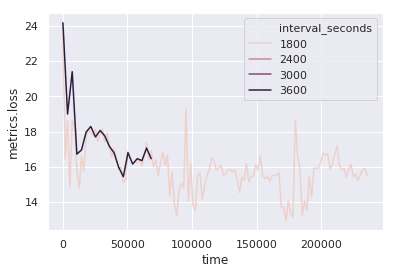

In [6]:
sns.set()

sns.lineplot(
    x="time", 
    y="metrics.loss", 
    #col="interval_seconds", 
    #kind="line", 
    hue="interval_seconds", 
    data=df
)